# Gender Based Violence Classification

EDA Notebook

In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Global settings
sns.set_theme()
sns.set_context("talk")

### Load Data

In [6]:
# Read csv
train_df = pd.read_csv('../data/Train.csv')
test_df = pd.read_csv('../data/Test.csv')
extra_df = pd.read_csv('../data/ExtraTweets.csv')

### EDA

In [7]:
train_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [8]:
train_df.shape

(39650, 3)

In [9]:
train_df.isna().sum()

Tweet_ID    0
tweet       0
type        0
dtype: int64

In [10]:
train_df['type'].value_counts()

type
sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: count, dtype: int64

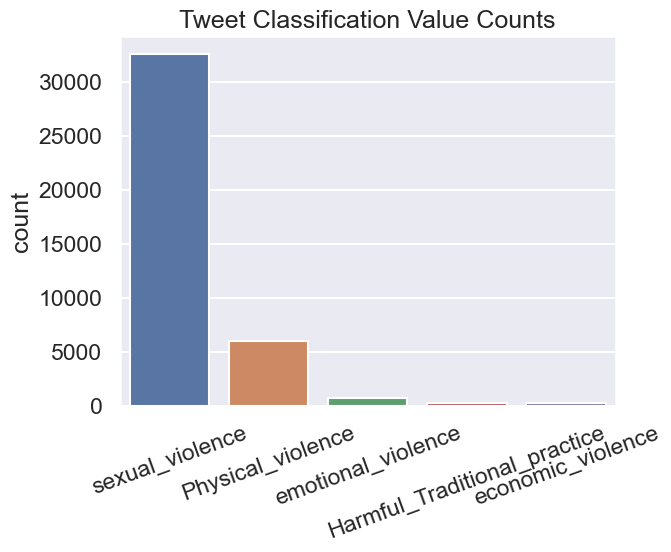

In [11]:
ax = sns.countplot(x = train_df['type'])
ax.set(xlabel=None)
plt.xticks(rotation=20)
plt.title('Tweet Classification Value Counts')
plt.show()

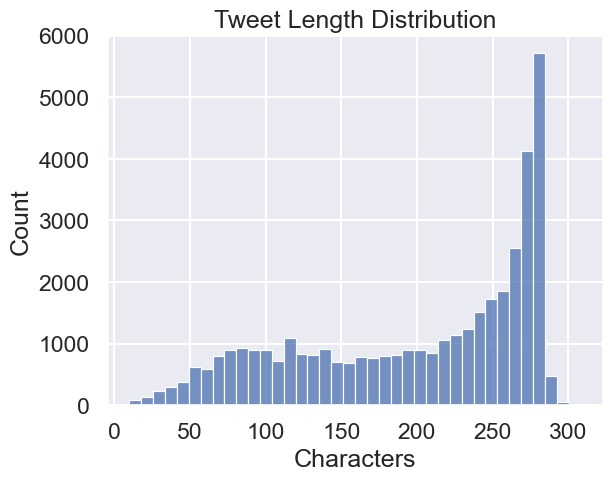

In [12]:
ax = sns.histplot(x=train_df['tweet'].str.len())
plt.title('Tweet Length Distribution')
plt.xlabel('Characters')
plt.show()

In [13]:
test_df.shape

(15581, 2)

In [14]:
test_df.columns

Index(['Tweet_ID', 'tweet'], dtype='object')

In [15]:
extra_df.shape

(27481, 4)

In [16]:
extra_df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [19]:
extra_df['sentiment'].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [37]:
counts = train_df['type'].value_counts().to_list() + [extra_df['sentiment'].value_counts().to_list()[0]]
labels = ['Sexual Violence', 'Physical Violence', 'Emotional Violence', 'Harmful Traditional Practice', 'Economic Violence', 'Neutral']

,0
Sexual Violence,32648
Physical Violence,5946
Emotional Violence,651
Harmful Traditional Practice,217
Economic Violence,188
Neutral,11118


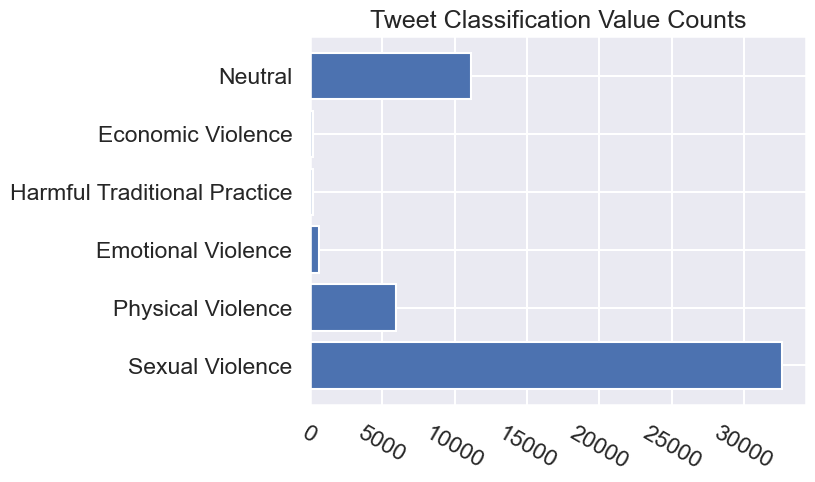

In [56]:
plt.barh(labels, counts)
plt.xticks(rotation=-30)
plt.title('Tweet Classification Value Counts')
plt.show()

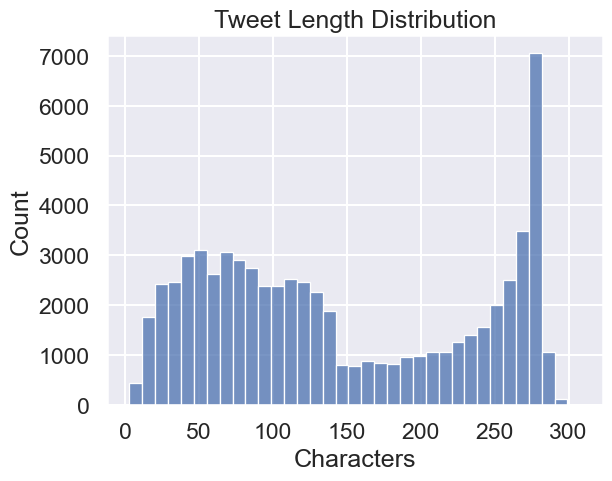

In [64]:
tweets = pd.concat([train_df['tweet'], extra_df['text']]).str.len()
ax = sns.histplot(tweets)
plt.title('Tweet Length Distribution')
plt.xlabel('Characters')
plt.show()

In [66]:
tweets.max()

308.0